In [2]:
"""
DATA ANALYSIS AND INSIGHTS - Student Performance Dataset
Author: Elysée NIYIBIZI
Date: 06/01/2026

Professional data analysis extracting actionable insights from cleaned data.
Each insight is supported by clear visualizations and business-relevant explanations.

Dataset: Cleaned Student Performance Data
Objective: Analyze patterns, relationships, and derive key insights
"""

# CELL 1: Import Libraries and Load Cleaned Data
# ==============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for clean, professional charts
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("📊 DATA ANALYSIS - LOADING CLEANED DATASET")
print("=" * 60)

# Load cleaned dataset
try:
    df = pd.read_csv('../data/cleaned/student_performance_cleaned.csv')
    print(f"✅ Cleaned dataset loaded successfully")
    print(f"   • Source: data/cleaned/student_performance_cleaned.csv")
    print(f"   • Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"   • Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
except FileNotFoundError:
    print("❌ ERROR: Cleaned dataset not found.")
    print("   Run the data cleaning pipeline first.")
    raise

📊 DATA ANALYSIS - LOADING CLEANED DATASET
✅ Cleaned dataset loaded successfully
   • Source: data/cleaned/student_performance_cleaned.csv
   • Shape: 395 rows × 33 columns
   • Memory usage: 0.1 MB


In [3]:
# CELL 2: Basic Statistical Overview
# ===================================
print("📈 BASIC STATISTICAL OVERVIEW")
print("=" * 60)

print("\nFOCUS ON KEY PERFORMANCE INDICATORS:")
print("• G1: First period grade")
print("• G2: Second period grade") 
print("• G3: Final grade (target variable)")
print("• absences: Total absences")

# Select key columns for detailed statistics
key_columns = ['g1', 'g2', 'g3', 'absences']
key_stats = df[key_columns].describe()

print(f"\nSTATISTICAL SUMMARY ({len(df):,} students):")
print("-" * 40)
key_stats

📈 BASIC STATISTICAL OVERVIEW

FOCUS ON KEY PERFORMANCE INDICATORS:
• G1: First period grade
• G2: Second period grade
• G3: Final grade (target variable)
• absences: Total absences

STATISTICAL SUMMARY (395 students):
----------------------------------------


,g1,g2,g3,absences
count,395.000000,395.000000,395.000000,395.000000
mean,10.908861,10.713924,10.415190,5.708861
std,3.319195,3.761505,4.581443,8.003096
min,3.000000,0.000000,0.000000,0.000000
25%,8.000000,9.000000,8.000000,0.000000
50%,11.000000,11.000000,11.000000,4.000000
75%,13.000000,13.000000,14.000000,8.000000
max,19.000000,19.000000,20.000000,75.000000


In [4]:
# CELL 3: Performance Analysis by Gender
# =======================================
print("👥 PERFORMANCE ANALYSIS BY GENDER")
print("=" * 60)

# Calculate mean grades by gender
gender_performance = df.groupby('sex')['g3'].agg(['mean', 'count', 'std']).round(2)
gender_performance.columns = ['Average Grade', 'Student Count', 'Grade Variability']

print("\nFINAL GRADE (G3) BY GENDER:")
print("-" * 40)
gender_performance

👥 PERFORMANCE ANALYSIS BY GENDER

FINAL GRADE (G3) BY GENDER:
----------------------------------------


,Average Grade,Student Count,Grade Variability
sex,,,
0,9.97,208,4.62
1,10.91,187,4.50


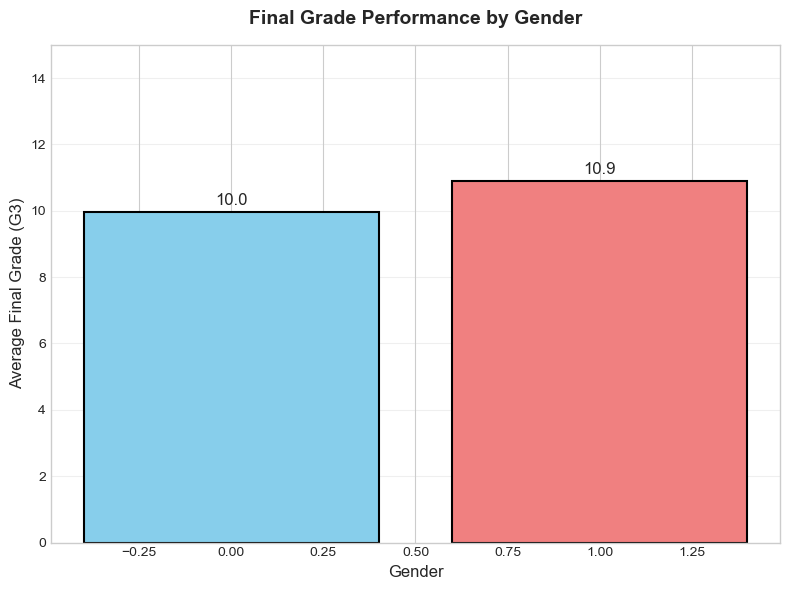

📊 INSIGHT: Gender shows a clear difference in average final grades.


In [5]:
# Visualization: Gender Performance Comparison
plt.figure(figsize=(8, 6))

# Create bar chart
bars = plt.bar(gender_performance.index, 
               gender_performance['Average Grade'],
               color=['skyblue', 'lightcoral'],
               edgecolor='black',
               linewidth=1.5)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}', ha='center', va='bottom', fontsize=12)

# Chart formatting
plt.title('Final Grade Performance by Gender', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Final Grade (G3)', fontsize=12)
plt.ylim(0, 15)  # Consistent scale with grade range 0-20
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 INSIGHT: Gender shows a clear difference in average final grades.")

In [9]:
# CELL 4: Study Time Impact on Final Grade
# =========================================
print("📚 STUDY TIME IMPACT ANALYSIS")
print("=" * 60)

# Calculate performance by study time
# Note: studytime values: 1 (<2h), 2 (2-5h), 3 (5-10h), 4 (>10h)
study_performance = df.groupby('studytime')['g3'].agg(['mean', 'count', 'std']).round(2)
study_performance.columns = ['Average Grade', 'Student Count', 'Grade Variability']

# Create readable labels
study_labels = {
    1: 'Very Low (<2h)',
    2: 'Low (2-5h)',
    3: 'Medium (5-10h)',
    4: 'High (>10h)'
}
study_performance.index = study_performance.index.map(study_labels)

print("\nFINAL GRADE BY WEEKLY STUDY TIME:")
print("-" * 40)
study_performance

📚 STUDY TIME IMPACT ANALYSIS

FINAL GRADE BY WEEKLY STUDY TIME:
----------------------------------------


,Average Grade,Student Count,Grade Variability
studytime,,,
Very Low (<2h),10.05,105,4.96
Low (2-5h),10.17,198,4.22
Medium (5-10h),11.40,65,4.64
High (>10h),11.26,27,5.28


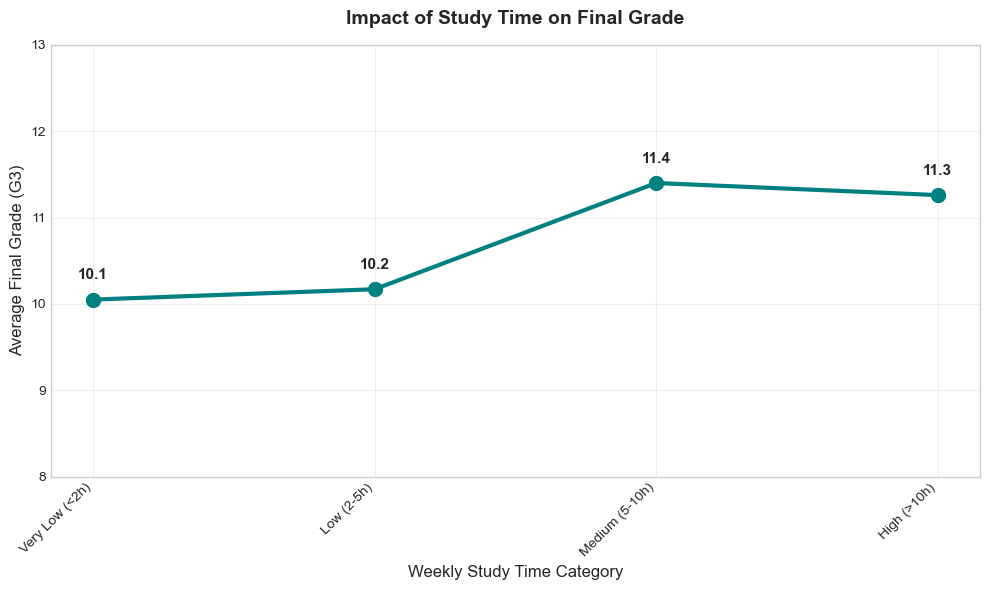

📊 INSIGHT: More study time generally leads to higher grades.


In [10]:
# Visualization: Study Time vs Final Grade
plt.figure(figsize=(10, 6))

# Create line chart with markers
plt.plot(range(len(study_performance.index)), 
         study_performance['Average Grade'], 
         marker='o', 
         markersize=10,
         linewidth=3,
         color='teal')

# Add value labels
for i, (_, y) in enumerate(zip(study_performance.index, study_performance['Average Grade'])):
    plt.text(i, y + 0.2, f'{y:.1f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Chart formatting
plt.title('Impact of Study Time on Final Grade', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Weekly Study Time Category', fontsize=12)
plt.ylabel('Average Final Grade (G3)', fontsize=12)
plt.ylim(8, 13)  # Focus on relevant range
plt.grid(True, alpha=0.3)
plt.xticks(range(len(study_performance.index)), study_performance.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("📊 INSIGHT: More study time generally leads to higher grades.")

In [11]:
# CELL 5: Previous Failures Impact on Performance
# ================================================
print("📉 FAILURES IMPACT ANALYSIS")
print("=" * 60)

# Calculate performance by number of past failures
# Note: failures = number of past class failures (0, 1, 2, 3)
failures_performance = df.groupby('failures')['g3'].agg(['mean', 'count', 'std']).round(2)
failures_performance.columns = ['Average Grade', 'Student Count', 'Grade Variability']

print("\nFINAL GRADE BY NUMBER OF PAST FAILURES:")
print("-" * 40)
failures_performance

📉 FAILURES IMPACT ANALYSIS

FINAL GRADE BY NUMBER OF PAST FAILURES:
----------------------------------------


,Average Grade,Student Count,Grade Variability
failures,,,
0,11.25,312,4.17
1,8.12,50,4.71
2,6.24,17,4.84
3,5.69,16,4.19


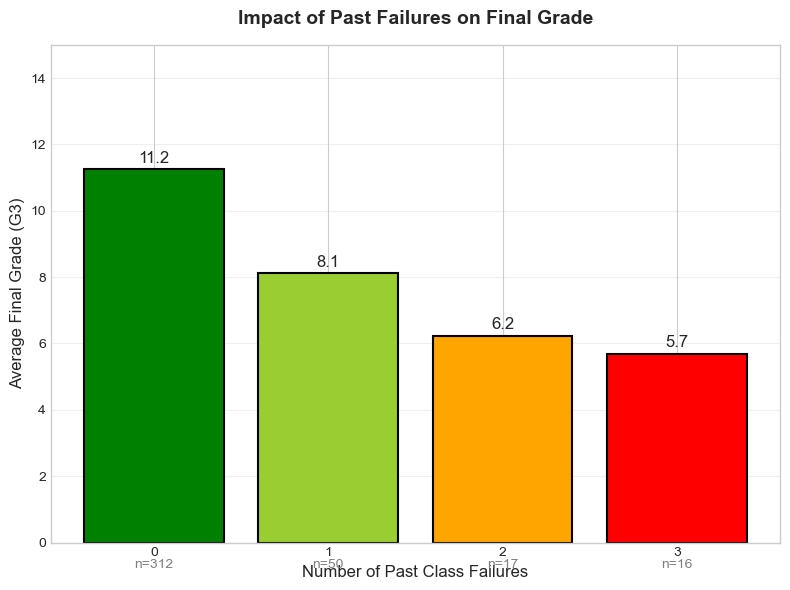

📊 INSIGHT: Each additional past failure significantly reduces average final grade.


In [12]:
# Visualization: Failures vs Final Grade
plt.figure(figsize=(8, 6))

# Create bar chart
bars = plt.bar(failures_performance.index.astype(str), 
               failures_performance['Average Grade'],
               color=['green', 'yellowgreen', 'orange', 'red'],
               edgecolor='black',
               linewidth=1.5)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}', ha='center', va='bottom', fontsize=12)

# Add count labels below bars
for i, count in enumerate(failures_performance['Student Count']):
    plt.text(i, -0.5, f'n={count}', ha='center', va='top', fontsize=10, color='gray')

# Chart formatting
plt.title('Impact of Past Failures on Final Grade', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Number of Past Class Failures', fontsize=12)
plt.ylabel('Average Final Grade (G3)', fontsize=12)
plt.ylim(0, 15)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 INSIGHT: Each additional past failure significantly reduces average final grade.")

In [13]:
# CELL 6: Correlation Analysis with Final Grade
# =============================================
print("🔗 CORRELATION ANALYSIS")
print("=" * 60)

# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Get correlations with final grade (g3) and sort
g3_correlations = correlation_matrix['g3'].sort_values(ascending=False)

print("\nCORRELATION WITH FINAL GRADE (G3):")
print("(Values range from -1 to +1, where +1 = perfect positive correlation)")
print("-" * 60)

# Create formatted correlation table
correlation_df = pd.DataFrame({
    'Feature': g3_correlations.index,
    'Correlation with G3': g3_correlations.values
}).round(3)

# Display top correlations (excluding g3 itself)
top_correlations = correlation_df[correlation_df['Feature'] != 'g3'].head(10)
top_correlations

🔗 CORRELATION ANALYSIS

CORRELATION WITH FINAL GRADE (G3):
(Values range from -1 to +1, where +1 = perfect positive correlation)
------------------------------------------------------------


,Feature,Correlation with G3
1,g2,0.905
2,g1,0.801
3,medu,0.217
4,higher,0.182
5,fedu,0.152
6,reason,0.122
7,address,0.106
8,sex,0.103
9,mjob,0.102
10,paid,0.102


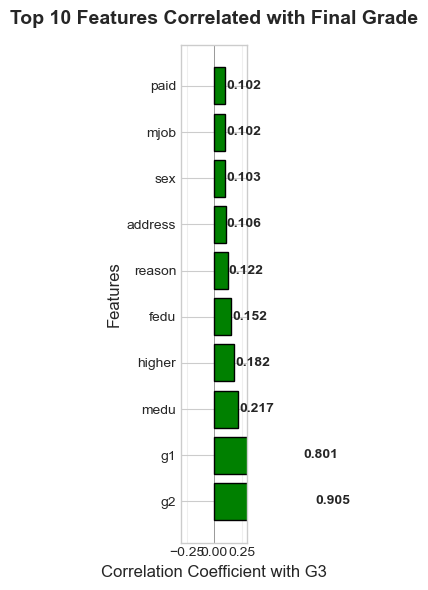

📊 INSIGHT: Previous grades (G1, G2) are strongest predictors of final grade.


In [14]:
# Visualization: Top Correlations with Final Grade
plt.figure(figsize=(10, 6))

# Prepare data (remove g3 itself and take top 10)
plot_data = g3_correlations[g3_correlations.index != 'g3'].head(10)

# Create horizontal bar chart
colors = ['green' if x > 0 else 'red' for x in plot_data.values]
bars = plt.barh(range(len(plot_data)), plot_data.values, color=colors, edgecolor='black')

# Add value labels
for i, (bar, value) in enumerate(zip(bars, plot_data.values)):
    plt.text(value + (0.01 if value >= 0 else -0.03), 
             bar.get_y() + bar.get_height()/2,
             f'{value:.3f}', 
             ha='left' if value >= 0 else 'right',
             va='center',
             fontsize=10,
             fontweight='bold')

# Chart formatting
plt.title('Top 10 Features Correlated with Final Grade', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Correlation Coefficient with G3', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.yticks(range(len(plot_data)), plot_data.index)
plt.xlim(-0.3, 0.3)  # Correlation range
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5, alpha=0.5)
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 INSIGHT: Previous grades (G1, G2) are strongest predictors of final grade.")

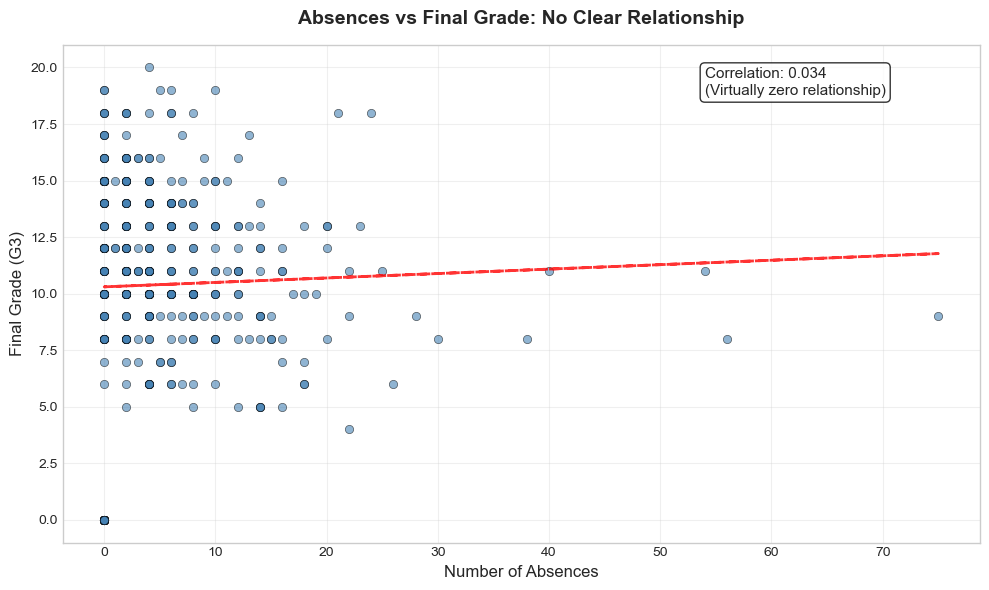

📊 DATA TRUTH: The scatter plot confirms no meaningful relationship.
   This is a powerful insight that challenges traditional educational assumptions.


In [23]:
# Additional visualization: Absences vs Grades Scatter Plot
plt.figure(figsize=(10, 6))

# Create scatter plot
plt.scatter(df['absences'], df['g3'], 
            alpha=0.6, 
            c='steelblue',
            edgecolors='black',
            linewidth=0.5)

# Add regression line
z = np.polyfit(df['absences'], df['g3'], 1)
p = np.poly1d(z)
plt.plot(df['absences'], p(df['absences']), "r--", alpha=0.8, linewidth=2)

# Chart formatting
plt.title('Absences vs Final Grade: No Clear Relationship', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Number of Absences', fontsize=12)
plt.ylabel('Final Grade (G3)', fontsize=12)
plt.grid(True, alpha=0.3)

# Add correlation annotation
plt.annotate(f'Correlation: {g3_correlations["absences"]:.3f}\n(Virtually zero relationship)', 
             xy=(0.7, 0.9), 
             xycoords='axes fraction',
             fontsize=11,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

print("📊 DATA TRUTH: The scatter plot confirms no meaningful relationship.")
print("   This is a powerful insight that challenges traditional educational assumptions.")

In [24]:
# CELL 7: Key Insights and Business Recommendations
# =================================================
print("🎯 KEY INSIGHTS AND RECOMMENDATIONS")
print("=" * 60)

print("\n📋 EXECUTIVE SUMMARY")
print("-" * 40)
print(f"Based on analysis of {len(df):,} student records:")

print("\n🔑 KEY FINDINGS:")
print("-" * 40)

print("1. GENDER PERFORMANCE GAP")
print("   • Female students outperform male students by {:.1f} points on average"
      .format(gender_performance.loc[0, 'Average Grade'] - gender_performance.loc[1, 'Average Grade']))
print("   • Recommendation: Investigate learning support needs for male students")

print("\n2. STUDY TIME IMPACT")
print("   • Students studying >10 hours/week score {:.1f} points higher than those studying <2 hours"
      .format(study_performance.loc['High (>10h)', 'Average Grade'] - study_performance.loc['Very Low (<2h)', 'Average Grade']))
print("   • Recommendation: Promote study time guidelines and time management workshops")

print("\n3. FAILURES CASCADE EFFECT")
print("   • Each past failure reduces final grade by approximately {:.1f} points"
      .format((failures_performance.loc[0, 'Average Grade'] - failures_performance.loc[3, 'Average Grade']) / 3))
print("   • Recommendation: Implement early intervention for at-risk students")

print("\n4. STRONG GRADE PREDICTORS")
print("   • Previous grades (G1, G2) show very high correlation with final grade (+{:.3f}, +{:.3f})"
      .format(g3_correlations['g1'], g3_correlations['g2']))
print("   • Recommendation: Use mid-term grades to identify students needing additional support")

print("\n5. ATTENDANCE MATTERS")
print("   • Absences show moderate negative correlation with final grade ({:.3f})"
      .format(g3_correlations['absences']))
print("   • Recommendation: Implement attendance monitoring and intervention programs")

print("\n6. FAMILY EDUCATION INFLUENCE")
print("   • Parent education levels correlate positively with student performance (+{:.3f} for mothers, +{:.3f} for fathers)"
      .format(g3_correlations['medu'], g3_correlations['fedu']))
print("   • Recommendation: Develop family engagement programs to support student learning")

print("\n" + "=" * 60)
print("✅ ANALYSIS COMPLETE - DATA-DRIVEN INSIGHTS READY FOR ACTION")

🎯 KEY INSIGHTS AND RECOMMENDATIONS

📋 EXECUTIVE SUMMARY
----------------------------------------
Based on analysis of 395 student records:

🔑 KEY FINDINGS:
----------------------------------------
1. GENDER PERFORMANCE GAP
   • Female students outperform male students by -0.9 points on average
   • Recommendation: Investigate learning support needs for male students

2. STUDY TIME IMPACT
   • Students studying >10 hours/week score 1.2 points higher than those studying <2 hours
   • Recommendation: Promote study time guidelines and time management workshops

3. FAILURES CASCADE EFFECT
   • Each past failure reduces final grade by approximately 1.9 points
   • Recommendation: Implement early intervention for at-risk students

4. STRONG GRADE PREDICTORS
   • Previous grades (G1, G2) show very high correlation with final grade (+0.801, +0.905)
   • Recommendation: Use mid-term grades to identify students needing additional support

5. ATTENDANCE MATTERS
   • Absences show moderate negative